## Efficient Frontier

In [87]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd

In [88]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
ASSETS = ["META", "TSLA", "NVDA", "MSFT", "AAPL"]
ASSETS.sort()
n_assets = len(ASSETS)

# Download data with adjusted close prices by setting actions=True
prices_df = yf.download(["META", "TSLA", "NVDA", "MSFT", "AAPL"],
                        start="2015-01-01",
                        end="2025-01-01",
                        actions=True)

# Check the structure of the DataFrame's columns
print(prices_df.head)

[*********************100%***********************]  5 of 5 completed

<bound method NDFrame.head of Price            Close                                                  \
Ticker            AAPL        META        MSFT        NVDA        TSLA   
Date                                                                     
2015-01-02   24.347172   78.151459   40.152493    0.483144   14.620667   
2015-01-05   23.661266   76.896263   39.783241    0.474983   14.006000   
2015-01-06   23.663502   75.860222   39.199337    0.460582   14.085333   
2015-01-07   23.995316   75.860222   39.697380    0.459382   14.063333   
2015-01-08   24.917269   77.882492   40.865192    0.476663   14.041333   
...                ...         ...         ...         ...         ...   
2024-12-24  258.200012  607.750000  439.329987  140.220001  462.279999   
2024-12-26  259.019989  603.349976  438.109985  139.929993  454.130005   
2024-12-27  255.589996  599.809998  430.529999  137.009995  431.660004   
2024-12-30  252.199997  591.239990  424.829987  137.490005  417.410004   
2024-12-

In [89]:
returns_df = prices_df["Close"].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [90]:
# Assuming avg_returns and cov_mat are already computed
np.random.seed(42)

# Random weights for the portfolios
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculate portfolio returns
portf_rtns = np.dot(weights, avg_returns)

# Calculate portfolio volatility (standard deviation)
portf_vol = []
for i in range(len(weights)):
    vol = np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i])))
    portf_vol.append(vol)  # append volatility for each portfolio

# Convert portf_vol to a numpy array after the loop
portf_vol = np.array(portf_vol)

# Calculate Sharpe ratio (assuming a risk-free rate of 0 for simplicity)
portf_sharpe_ratio = portf_rtns / portf_vol

# Create a DataFrame to store results
portf_results_df = pd.DataFrame({
    "returns": portf_rtns,
    "volatility": portf_vol,
    "sharpe_ratio": portf_sharpe_ratio
})

# Display results (optional)
print(portf_results_df.head())

    returns  volatility  sharpe_ratio
0  0.372260    0.294875      1.262433
1  0.441500    0.330115      1.337415
2  0.330127    0.292778      1.127570
3  0.411884    0.305011      1.350391
4  0.407808    0.308792      1.320655


In [91]:
N_POINTS = 100
ef_rtn_list = []
ef_vol_list = []
possible_ef_rtns = np.linspace(portf_results_df["returns"].min(),
                               portf_results_df["returns"].max(),
                               N_POINTS)
possible_ef_rtns = np.round(possible_ef_rtns, 2)
portf_rtns = np.round(portf_rtns, 2)
for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

/var/folders/8t/9x300h9d4mqbt6mxkkmsbh6m0000gn/T/ipykernel_17638/3576140667.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=avg_returns[asset_index],


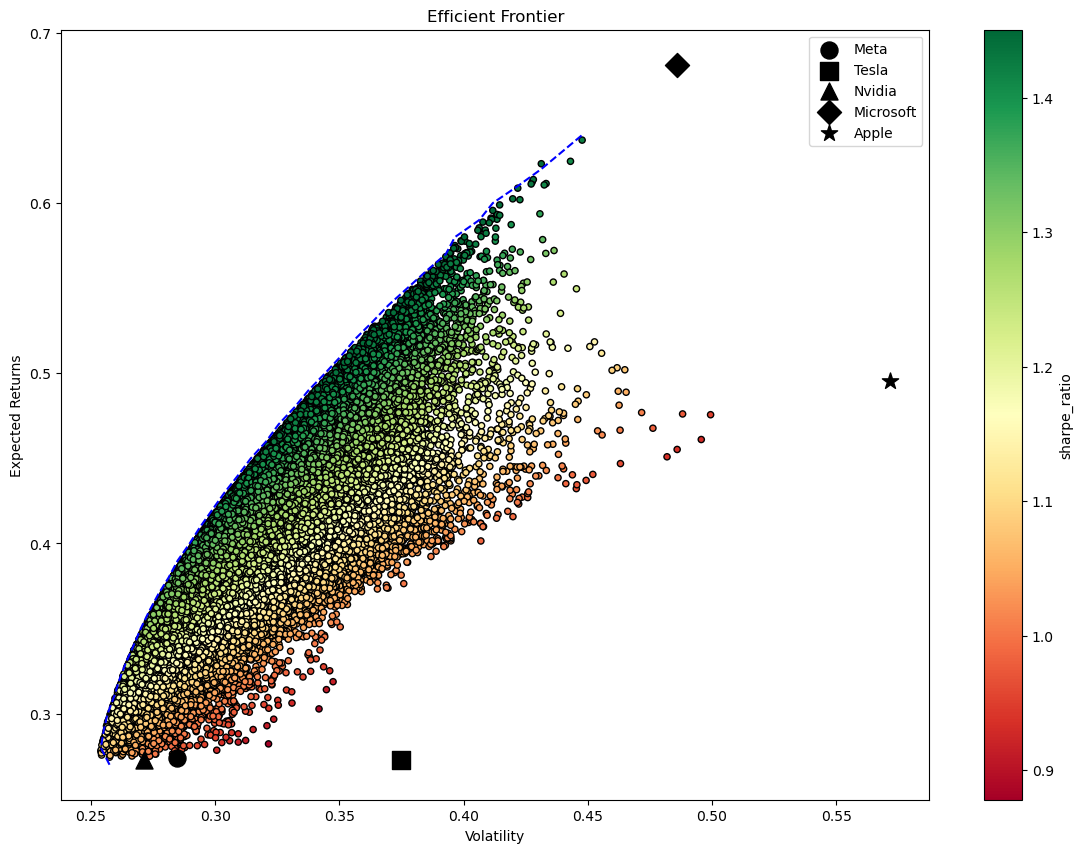

In [103]:
MARKERS = ['o', 's', '^', 'D', '*']  # Example markers
ASSETS = ["Meta", "Tesla", "Nvidia", "Microsoft", "Apple"]

fig, ax = plt.subplots(figsize=(14, 10))  # Increase the figure size here
portf_results_df.plot(kind="scatter", x="volatility",
                      y="returns", c="sharpe_ratio",
                      cmap="RdYlGn", edgecolors="black", ax=ax)

ax.set(xlabel="Volatility", ylabel="Expected Returns", title="Efficient Frontier")
ax.plot(ef_vol_list, ef_rtn_list, "b--")

for asset_index in range(len(ASSETS)):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=MARKERS[asset_index],  # Use valid markers here
               s=150, color="black", label=ASSETS[asset_index])

ax.legend()
plt.show()